# Анализ бизнес-показателей

В нашем распоряжении данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Нам предстоит изучить:
как клиенты пользуются сервисом,
когда делают первые покупки на сайте,
сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.
Наша задача: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

## План работ по анализу бизнес-показателей Яндекс.Афиши

<div class="alert alert-info" role="alert">
Нам представлены данные Яндекс.Афиши с июня 2017 по конец мая 2018 года. 
Данные представляют собой 3 датасета с информацией о визитах пользователей, заказов и расходов на привлечение клиентов.

Шаг 1. Откроем файлы с данными и изучим общую информацию. Постараемся заполнить пропуски по мере необходимости, вывести корректное время и т.д.
Добавим необходимые столбцы для удобства анализа, сравнения и получения дополнительных данных.

Шаг 2. Рассчитаем метрики и построим графики:
    Посчитаем метрики трёх видов:
        продуктовые,
        метрики электронной коммерции,
        маркетинговые.
Отобразим на графиках изменения каждой метрики во времени.

Рассчитывать метрики будем следующим образом:

2.1. Продуктовые метрики
2.1.1. Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период;
2.1.2. Определим, сколько раз за день пользователи в среднем заходят на сайт;
2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Построим график распределения;
2.1.4. Рассчитаем Retention Rate, применяя когортный анализ. Найдем средний Retention Rate на второй месяц «жизни» когорт.

2.2. Метрики электронной коммерции
2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
2.2.2. Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев;
2.2.3. Рассчитаем средний чек;
2.2.4. Выясним, как меняется во времени LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев;

2.3. Маркетинговые метрики
Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.
2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам;
2.3.2. Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика;
2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.
    
    
Шаг 3. Сформулируем выводы и рекомендации
3.1. Определим источники трафика, на которые маркетологам стоит делать упор;
3.2. Опишем выводы, которые мы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
3.3. Подведим итоги когортного анализа. Определим самые перспективные для компании когорты клиентов;
</div>

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
visits= pd.read_csv("/datasets/visits_log.csv")
visits.columns = map(str.lower, visits.columns)
visits.info()
visits.head()
visits['device'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null object
source id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


array(['touch', 'desktop'], dtype=object)

Таблица заполенеа полностью, приведем столбцы к нижнему регистру и без пробелов. Столбцам со временем присвоим тип дата.

In [3]:
visits = visits.rename(columns={'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts'}) 
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['start_ts_time'] = visits['start_ts']
visits

,device,end_ts,source_id,start_ts,uid,start_ts_time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00


In [4]:
visits_start_end = visits.query('start_ts >= end_ts')
visits_start_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35796 entries, 2 to 358529
Data columns (total 6 columns):
device           35796 non-null object
end_ts           35796 non-null datetime64[ns]
source_id        35796 non-null int64
start_ts         35796 non-null datetime64[ns]
uid              35796 non-null uint64
start_ts_time    35796 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(1), uint64(1)
memory usage: 1.9+ MB


В данных присутствуют значения со временем окончания сессии раньше, чем ее начало.Таких значений всего2. Также присутствуют значения с равным временем начала и окончания сессии. Таких значений почти 36 тысяч, это уже систематическая ошибка в некорректном определении времени начала/окончания сессии. Поскольку среднее значение покупки или нахождение на сайте исчисляется несколькими минутами, для дальнейшего анализа и составления когорт данный баг не критичен.

Выгрузим датафрейм orders. Таблица заполенеа полностью, приведем столбцы к нижнему регистру и без пробелов. Столбцам со временем присвоим тип дата. Уберем строку содержащую покупку за июнь 2018 года, не входящую в интервал исследования.

In [5]:
orders= pd.read_csv("/datasets/orders_log.csv")
orders = orders.query('Uid != 83872787173869366')
orders.columns = map(str.lower, orders.columns)
orders = orders.rename(columns={'buy ts':'buy_ts'}) 
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders['buy_ts_sec'] = orders['buy_ts']
orders.head()

,buy_ts,revenue,uid,buy_ts_sec
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [6]:
orders_rev = orders.query('revenue <= 0')
orders_rev['revenue'].count()

51

У нас есть 51 оплата с нулевой суммой. Скорее всего данные пользователи сделали покупку по подарочным сертификатам, баллам или сторонние ресурсы, когда платеж прошел не на прямую. Оставим эти данные в нашем анализе, т.к покупка совершена, клиент привлечен.

In [7]:
costs= pd.read_csv("/datasets/costs.csv")
costs['dt'] = pd.to_datetime(costs['dt'])
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Таблица заполенеа полностью. Столбцу со временем присвоим тип дата.

# Шаг 2. Рассчитаем метрики и построим графики

## Продуктовые метрики

### Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период

Определим количество уникальных пользователей в день - DAU. Добавим столбцы с годом, месяцем, неделей и датой визитов.

In [8]:
visits_data = visits
visits_data['session_year'] = visits_data['start_ts'].dt.year
visits_data['session_month'] = visits_data['start_ts'].dt.month
visits_data['session_week'] = visits_data['start_ts'].dt.week
visits_data['session_date'] = visits_data['start_ts'].dt.date
#visits_data.head()

Сгруппируем session_date по уникальным uid

In [9]:
dau_total = visits_data.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день:', int(dau_total))

Количество уникальных пользователей в день: 907


Построим график посещения уникальных пользователей в день

In [10]:
uid_visit_day = visits_data.groupby('session_date').agg({'uid': 'nunique'}).reset_index() 


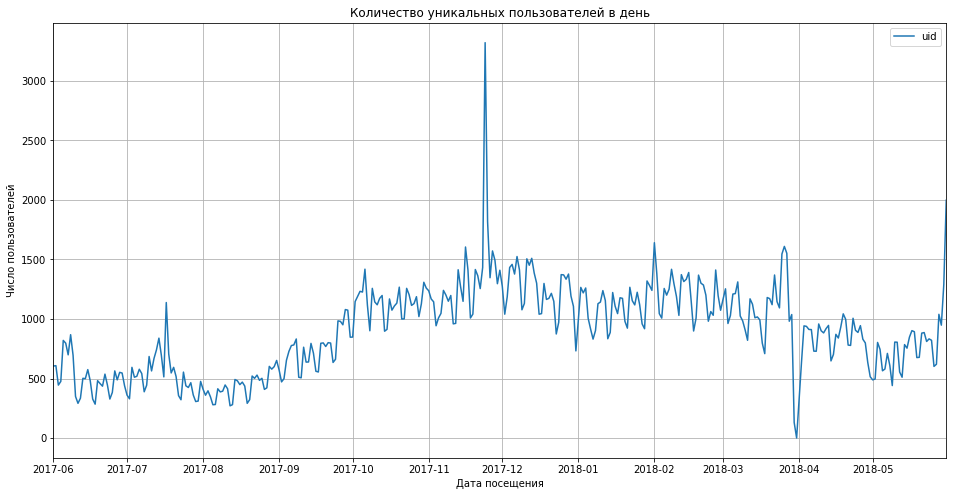

In [11]:
uid_visit_day.plot(y='uid', x='session_date', grid=True, figsize=(16, 8));
plt.title('Количество уникальных пользователей в день')
plt.xlabel('Дата посещения')
plt.ylabel('Число пользователей');


Наблюдается плавное увеличение числа пользователей с 500 с августа до 1500 в декабре, затем такое же плавное снижение.

Определим количество уникальных пользователей в неделю - WAU. Сгруппируем session_year и session_week по уникальным uid

In [12]:
wau_total = visits_data.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в неделю:', int(wau_total))

Количество уникальных пользователей в неделю: 5716


Построим график посещения уникальных пользователей в неделю

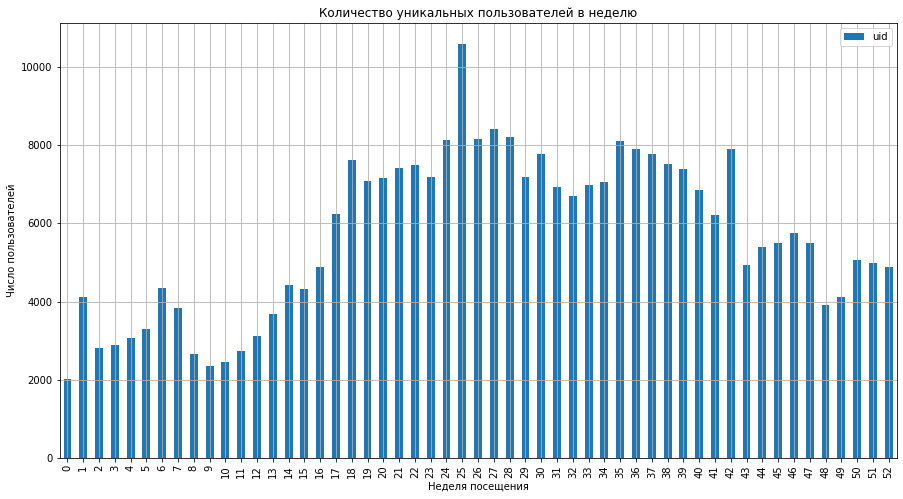

In [13]:
uid_visit_week = visits_data.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
\
plt.title('Количество уникальных пользователей в неделю')
plt.xlabel('Неделя посещения')
plt.ylabel('Число пользователей');

Наблюдается плавное увеличение числа пользователей в неделю от 2-х тысяч в июне до 8 тысяч в декабре и в дальнейшем плавное снижение посещаемости

Определим количество уникальных пользователей в месяц - MAU. Сгруппируем session_year и session_month по уникальным uid

In [14]:
mau_total = visits_data.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в месяц:', int(mau_total))

Количество уникальных пользователей в месяц: 23228


Построим график посещения уникальных пользователей в месяц

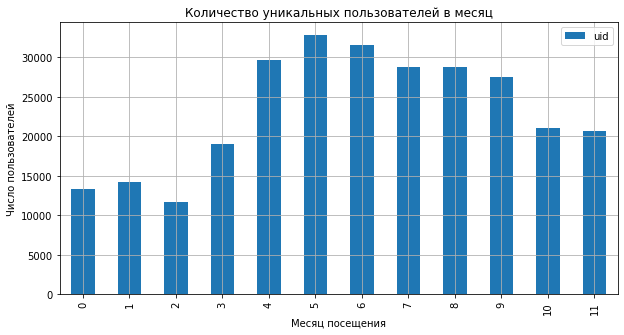

In [15]:
uid_visit_month = visits_data.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
uid_visit_month.plot(kind='bar', y='uid', grid=True, figsize=(10, 5))
plt.title('Количество уникальных пользователей в месяц')
plt.xlabel('Месяц посещения')
plt.ylabel('Число пользователей');

Наблюдается плавное увеличение числа пользователей в месяц от 12 тысяч в июне до 32 тысяч в декабре и в дальнейшем плавное снижение посещаемости

Проанализировав количество уникальных пользователей за нень/неделю/месяц мы наблюдаем сезонное изменение числа пользователей с минимальным количеством в летнее время и плавным увеличением в 3 раза в зимнее время и также дальнейшим плавным снижением до летнего периода.

### Определим, сколько раз за день пользователи в среднем заходят на сайт

Определим сколько раз за день пользователи в среднем заходят на сайт. Сгруппируем session_date по числу пользователей uid

In [16]:
sessions_per_user = visits_data.groupby('session_date').agg({'uid': 'count'}).mean()
print('Среднее число пользователей за день:', int(sessions_per_user))

Среднее число пользователей за день: 987


In [17]:
visit_unique_day = visits_data.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('Число посещений в среднем на одного пользователя приходится в день:', (sessions_per_user/visit_unique_day).round(2))

Число посещений в среднем на одного пользователя приходится в день: uid    1.09
dtype: float64


In [18]:
visit_week = visits_data.groupby('session_week').agg({'uid': 'count'}).mean()
visit_unique_week = visits_data.groupby('session_week').agg({'uid': 'nunique'}).mean()
print('Число посещений в среднем на одного пользователя приходится в неделю:', (visit_week/visit_unique_week).round(2))

Число посещений в среднем на одного пользователя приходится в неделю: uid    1.19
dtype: float64


In [19]:
visit_month = visits_data.groupby('session_month').agg({'uid': 'count'}).mean()
visit_unique_month = visits_data.groupby('session_month').agg({'uid': 'nunique'}).mean()
print('Число посещений в среднем на одного пользователя приходится в месяц:', (visit_month/visit_unique_month).round(2))

Число посещений в среднем на одного пользователя приходится в месяц: uid    1.29
dtype: float64


Один пользователель в день в среднем заходит на сайт чуть более 1 раза, за неделю около 1.2 раза и за месяц 1.3 раза

### Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Построим график распределения

Определим время нахождения на сайте как разницу между началом и окончанием сессии

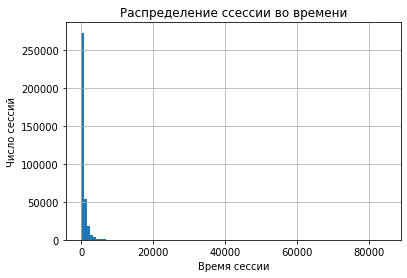

In [20]:
from matplotlib import pyplot as plt
visits_time = visits_data
visits_time['session_duration_sec'] = (visits_time['end_ts'] - visits_time['start_ts']).dt.seconds
visits_time['session_duration_sec'].hist(bins=100); 
plt.title('Распределение ссессии во времени')
plt.xlabel('Время сессии')
plt.ylabel('Число сессий');

 Рассчитаем моду - значение в выборке, которое встречается чаще всего

In [21]:
asl = visits_time['session_duration_sec'].mode()
asl

0    60
dtype: int64

Продолжительность типичной пользовательской сессии составляет 60 секунд

### Рассчитаем Retention Rate, применяя когортный анализ

Определим сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. Определим событие и период — на их основе сформируем месячную когорту. Возьмём дату, когда пользователь впервые проявил активность в мобильном приложении.

In [22]:
import numpy as np
user_activity = orders
first_activity_date = user_activity.groupby(['uid'])['buy_ts'].min()
first_activity_date.name = 'first_activity_date'
user_activity = user_activity.join(first_activity_date,on='uid')
user_activity['activity_month'] = user_activity['buy_ts'].astype('datetime64[M]')
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')

Для каждой строки датафрейма определим срок жизни кагорты, как разницу текущей сессии к первому заходу

In [23]:
user_activity['cohort_lifetime'] = user_activity['activity_month'] - user_activity['first_activity_month']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int')
#user_activity.head()

Сгруппируем данные по когорте и посчитаем для каждой когорты количество активных пользователей на определённую месяц жизни.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц.

In [24]:
cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Объединим данные по когортам с исходным количеством пользователей в когорте. Рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте. Построим сводную таблицу

In [25]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.loc['mean'] = retention_pivot.mean()
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01 00:00:00,1.0,0.0301532,0.0247158,0.026693,0.0434998,0.0331191,0.0306476,0.0232328,0.0286703,0.0222442,0.0222442,0.0261987
2017-07-01 00:00:00,1.0,0.0270411,0.0296412,0.0332813,0.025481,0.0197608,0.0187207,0.0202808,0.0218409,0.0114405,0.0135205,
2017-08-01 00:00:00,1.0,0.0423358,0.0386861,0.0321168,0.0291971,0.0233577,0.0218978,0.0321168,0.0138686,0.0226277,,
2017-09-01 00:00:00,1.0,0.0503681,0.0387447,0.0286711,0.0201472,0.0247966,0.0255715,0.0143355,0.0166602,,,
2017-10-01 00:00:00,1.0,0.0474654,0.028341,0.0211982,0.0214286,0.0165899,0.0129032,0.0154378,,,,
2017-11-01 00:00:00,1.0,0.0543984,0.0294046,0.025974,0.0198481,0.0117618,0.0151924,,,,,
2017-12-01 00:00:00,1.0,0.0333105,0.0234999,0.022131,0.0114077,0.0143737,,,,,,
2018-01-01 00:00:00,1.0,0.0337978,0.0246072,0.0127483,0.0133412,,,,,,,
2018-02-01 00:00:00,1.0,0.0323199,0.0158861,0.010682,,,,,,,,


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Отличный расчет и визуализация на тепловой карте метрики RR. Молодец, что подправил градиентную заливку через параметр `vmax` К таблице можно было бы еще добавить строку со средним показателей по времени жизни среди всех когорт
    
`retention_pivot.loc['mean'] = retention_pivot.mean()`
</div>


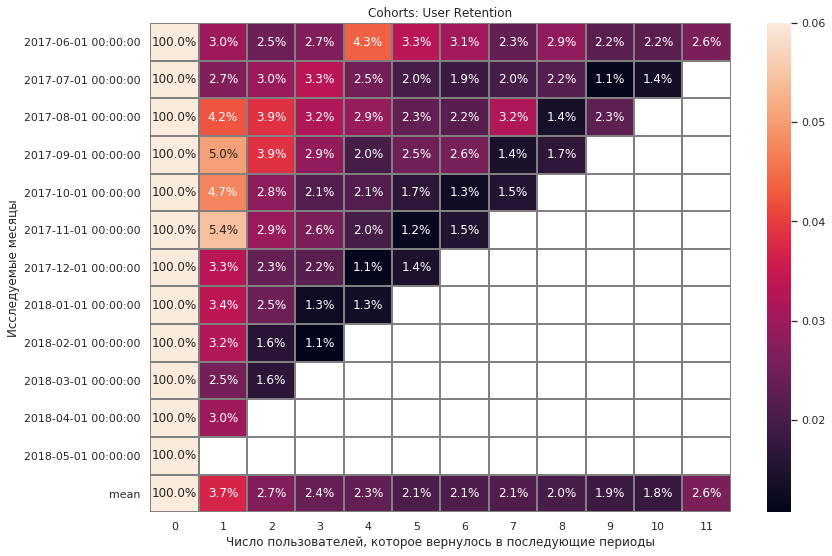

In [26]:
import seaborn as sns
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmax = .06); 
plt.title('Cohorts: User Retention')
plt.xlabel('Число пользователей, которое вернулось в последующие периоды')
plt.ylabel('Исследуемые месяцы');

По всем когортам число пользователей из когорты относительно их изначального числа ввозвращается очень мало. Данный показатель варируется в пределах 1-5%. Возможно это связано с тем, что концерты, театры, выставки пользователи посещают далеко не каждый месяц.

### Вывод по продуктовым метрикам

Проанализировав продуктовые метрики, мы пришли к следующим выводам:
Количество уникальных пользователей в день состаляет 907 человек;
Количество уникальных пользователей в неделю состаляет 5716 человек;
Количество уникальных пользователей в неделю состаляет 5716 человек;
Среднее число пользователей за день состаляет 987 человек;
Чаще всего пользователи проводят на сайте около минуты;
Число пользователей которые вернулись в последующие месяцы составляет 1-5%.
Низкий показатель возврата пользователей возможно это связано с тем, что концерты, театры, выставки пользователи посещают далеко не каждый месяц.

## Метрики электронной коммерции

### Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

Определим время первой покупки - first_pay. Определим время первого посещения сайта - first_visit. 

In [27]:
first_pay = orders.groupby(['uid'])['buy_ts_sec'].min().reset_index() 
first_visit = visits.groupby(['uid'])['start_ts_time'].min().reset_index() 
time_first_buy = first_visit.merge(first_pay,on='uid')
time_first_buy['time_day'] = (time_first_buy['buy_ts_sec'] - time_first_buy['start_ts_time']).dt.days
time_first_buy['time'] = (time_first_buy['buy_ts_sec'] - time_first_buy['start_ts_time']).dt.seconds
#time_first_buy

In [28]:
print('Среднее время с момента первого посещения сайта до совершения покупки, дней:',
(time_first_buy['buy_ts_sec'] - time_first_buy['start_ts_time']).median())

Среднее время с момента первого посещения сайта до совершения покупки, дней: 0 days 00:16:00


Среднее время совершения покупки с момента первого посещения сайта составдяет 16 минут 

### Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев

Сгруппируем данные покупок по пользователям, определим время первой покупки и их число покупок

In [29]:
first_activity_date = orders.groupby(['uid']).agg({'revenue': 'count', 'buy_ts': 'min'}).reset_index()
first_activity_date.columns = ['uid', 'revenue_c', 'first_activity_date']
first_activity_date['activity_month'] = first_activity_date['first_activity_date'].astype('datetime64[M]')
first_activity_date.head()

,uid,revenue_c,first_activity_date,activity_month
0,313578113262317,1,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,1,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,1,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2,2017-11-24 10:14:00,2017-11-01


В столбец time_end поставим дату окончания анализа и определим активный период от момента первой покупки до окончания исследуемого периода.

In [30]:
first_activity_date['time_end'] = '2018-06-01' 
first_activity_date['time_end'] = pd.to_datetime(first_activity_date['time_end'])
first_activity_date['activ_month'] = first_activity_date['time_end'] - first_activity_date['activity_month']
first_activity_date['activ_month'] = first_activity_date['activ_month'] / np.timedelta64(1,'M')
first_activity_date['activ_month'] = first_activity_date['activ_month'].round().astype('int')
first_activity_date.head()

,uid,revenue_c,first_activity_date,activity_month,time_end,activ_month
0,313578113262317,1,2018-01-03 21:51:00,2018-01-01,2018-06-01,5
1,1575281904278712,2,2017-06-03 10:13:00,2017-06-01,2018-06-01,12
2,2429014661409475,1,2017-10-11 18:33:00,2017-10-01,2018-06-01,8
3,2464366381792757,1,2018-01-28 15:54:00,2018-01-01,2018-06-01,5
4,2551852515556206,2,2017-11-24 10:14:00,2017-11-01,2018-06-01,7


Среднее количество покупок на одного покупателя за 6 месяцев. Для этого определим суммарное число покупок и поделим его на сумму месяцев активного периода. Далее наше значение умножим на требуемое число месяцев

In [31]:
sum_buy_month = first_activity_date['revenue_c'].sum() / first_activity_date['activ_month'].sum()
sum_buy_6_month = sum_buy_month * 6
print('Среднее количество покупок на одного покупателя за 6 месяцев:', (sum_buy_6_month).round(1))

Среднее количество покупок на одного покупателя за 6 месяцев: 1.4


### Рассчитаем средний чек

In [32]:
print('Средний чек, у.е.:', orders['revenue'].mean().round(1))

Средний чек, у.е.: 5.0


In [33]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
revenue_month_mean = orders.groupby('order_month').agg({'revenue': 'mean'}).reset_index()

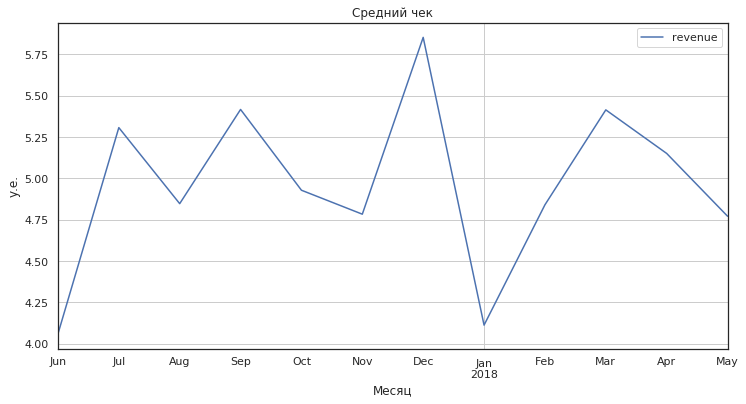

In [34]:
revenue_month_mean.plot(y='revenue', x='order_month', grid=True, figsize=(12, 6));
plt.title('Средний чек')
plt.xlabel('Месяц')
plt.ylabel('у.е.');

В декабре месяце наблюдается увеличение среднего чека, в январе и июне сильная просадка. Далее средний чек в течение года находится в предалах 5 у.е.

### Изменнение во времени LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев

Сгруппируем данные по пользователям и первой покупке.
Определим месяц первой покупки и число покупателей.
Объединим два датасета по пользователям.
Сгруппируем данные по первому месяцу покупки и месяцу покупки

In [35]:
ltv = orders
ltv['order_month'] = ltv['buy_ts'].astype('datetime64[M]')
ltv_orders = ltv.groupby('uid').agg({'order_month': 'min'}).reset_index()
ltv_orders.columns = ['uid', 'first_order_month']
cohort_sizes = ltv_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_first_month = pd.merge(orders,ltv_orders, on='uid')
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

Объединим предыдущие датасеты по первому месяцу оплаты.
Найдем валовую прибыль, умножив выручку на маржинальность.
Определим возраст когорты по месяцам.
Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
Сделаем сводную таблицу

In [36]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
result = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')

Создадим столбец с месяцем расходов.
Создадим таблицу с месяцем расходов и суммарной оплатой.
Объединим предыдущие таблицы по месяцам.
Добавим столбцы с месяцем и годом и сделаем срез, убрав значения первой оплаты до декабря 2017 года.

In [37]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['m'] = report_new['first_order_month'].dt.month
report_new['y'] = report_new['first_order_month'].dt.year
#report_new = report_new.query('y == 2017' or 'm <= 11')
#report_new.sample(20)

Сделаем наглядную сводную таблицу LTV

In [38]:
final_result = report_new.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean').cumsum(axis=1).round(2)
final_result.loc['mean'] = final_result.mean()
#final_result.fillna('')

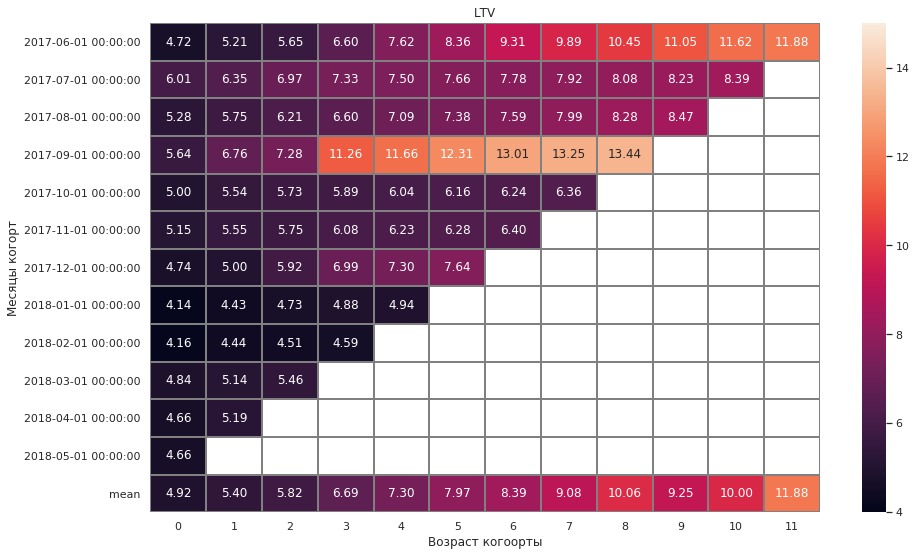

In [39]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(final_result, annot=True, linewidths=1, linecolor='gray',vmax = 15, vmin = 4.0, fmt=".2f"); 
plt.title('LTV')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

LTV когорты сентябрь месяц в декабре месяце показало отличный прирост и в 2 раза превышает остальные когорты за аналогичный период. Когорты за январь и февраль за 4-5 месяцев практически не показали прироста.

Посчитаем LTV средней когорты за 6 месяцев после первой покупки

In [40]:
m6_cum_ltv = final_result.mean(axis=0)[5]
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv.round(2))

Средний LTV за 6 месяцев после первой покупки: 7.97


### Вывод по метрикам электронной коммерции

Проанализировав метрики электронной коммерции, мы пришли к следующим выводам:
Среднее время с момента первого посещения сайта до совершения покупки составляет 16 минут;
Среднее количество покупок на одного покупателя за 6 месяцев составляет 1.4;
Средний чек, у.е. - 5.0;
Средний LTV за 6 месяцев после первой покупки составляет около 8 у.е.
Наблюдается плавное увеличение числа пользователей с 500 с августа до 1500 в декабре, затем такое же плавное снижение.
Идет плавное увеличение числа пользователей в месяц от 12 тысяч в июне до 32 тысяч в декабре и в дальнейшем плавное снижение посещаемости.
Количество уникальных пользователей за день/неделю/месяц мы наблюдаем сезонное изменение числа пользователей с минимальным количеством в летнее время и плавным увеличением в 3 раза в зимнее время и также дальнейшим плавным снижением до летнего периода.

## Маркетинговые метрики

### Общая сумму расходов на маркетинг. Распределение трат по источникам

Из таблицы costs определим общую сумму затрат на привлечение клиентов

In [41]:
costs_sum = costs['costs'].sum()
costs_sum

329131.62

Определим, как распределены затраты на привлечение клиентов в зависимости о источников

In [42]:
source_costs = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
source_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


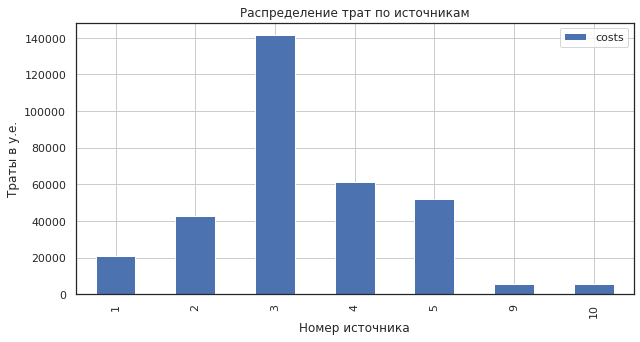

In [43]:
source_costs.plot(kind='bar', y='costs', x='source_id', grid=True, figsize=(10, 5));
plt.title('Распределение трат по источникам')
plt.xlabel('Номер источника')
plt.ylabel('Траты в у.е.');

Основные траты приходятся на 3-й источник, примерно одинаковые траты распределены между 2-м, 4-м и 5-м источниками, на 9-й и 10-й приходится незначительные траты.

In [44]:
source_costs_month = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

In [45]:
a = source_costs_month.query('source_id == 1')
b = source_costs_month.query('source_id == 2')
c = source_costs_month.query('source_id == 3')
d = source_costs_month.query('source_id == 4')
e = source_costs_month.query('source_id == 5')
f = source_costs_month.query('source_id == 9')
g = source_costs_month.query('source_id == 10')

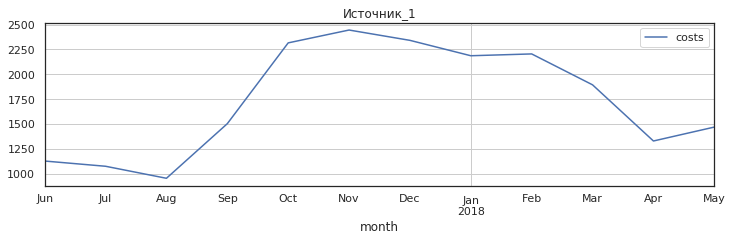

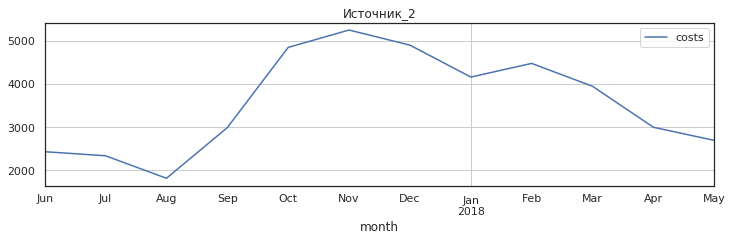

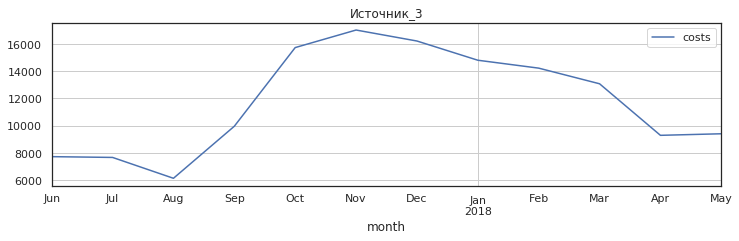

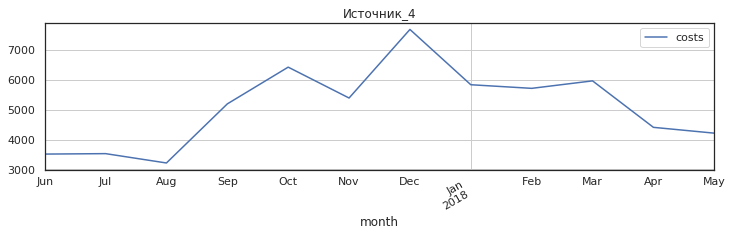

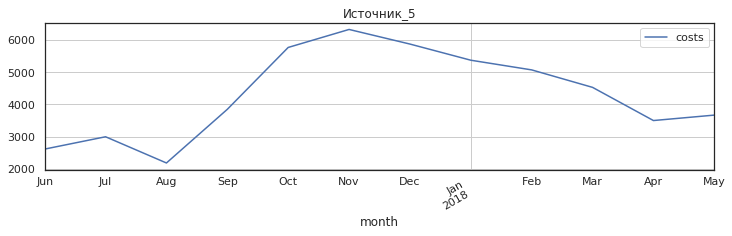

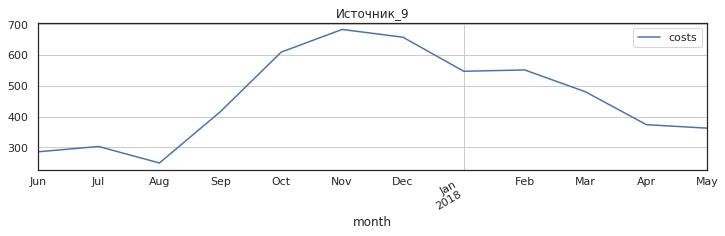

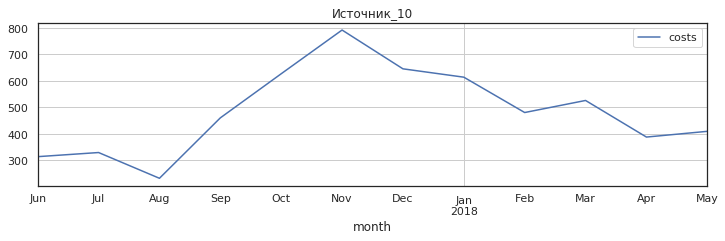

In [46]:
a.plot(y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_1')
b.plot(y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_2')
c.plot(y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_3')
d.plot(subplots=True, y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_4')
e.plot(subplots=True, y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_5')
f.plot(subplots=True, y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_9')
g.plot(y='costs', x='month', grid=True, figsize=(12, 3))
plt.title('Источник_10');

Все распределения расходов по источникам выглядят одинаково. В летние месяцы затраты минимальны, до зимы идет увеличение в 2-3 раза, потом спад

### Средний CAC на одного покупателя для всего проекта и для каждого источника трафика

Сгруппируем наши суммарные траты с расходами по месяцам 

In [47]:
costs_months = costs.groupby('month')['costs'].sum().reset_index()

Объединим costs_months с cohort_sizes из подсчета LTV по месяцам

In [48]:
cac = pd.merge(cohort_sizes, costs_months, left_on='first_order_month', right_on='month')

Разделим общие расходы по месяцам на число покупателей 

In [49]:
cac['cac'] = cac.costs / cac.n_buyers

In [50]:
cac['cac'].mean()

9.147357292482544

Построим график изменения стоимости привлечения клиента по месяцам

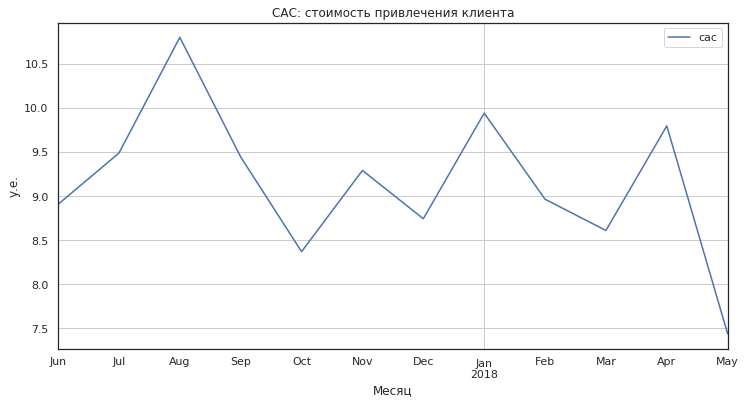

In [51]:
cac.plot(y='cac', x='month', grid=True, figsize=(12, 6));
plt.title('САС: стоимость привлечения клиента')
plt.xlabel('Месяц')
plt.ylabel('у.е.');

Минимальная стоимость привлечения клиента в мае, максимальная в августе, в остальное время стоимость привлечения клиента близка к среднему значению

Посчитаем САС отдельно по источникам                                                                                              

Отсортируем визиты по start_ts и сгруппируем по uid, применим first к source_id

In [52]:
visits_uid = visits.sort_values('start_ts').groupby('uid').first()

Смержим visits_uid с orders

In [53]:
# 2
orders_source = pd.merge(orders, visits_uid['source_id'], on='uid', how='left')

Сгруппируем orders по source_id посчитав число уникальных покупателей

In [54]:
source_uid = orders_source.groupby('source_id').agg({'uid': 'nunique'}).reset_index()

Сгруппируем затраты по источникам

In [55]:
source_costs = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

Смерижим пункты source_uid и source_costs по источникам

In [56]:
cac_source = pd.merge(source_uid, source_costs, on='source_id')

Определим САС по источникам поделив стоимость 

In [57]:
cac_source['cac'] = cac_source.costs / cac_source.uid 
cac_source

,source_id,uid,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10295,61073.60,5.932356
4,5,6931,51757.10,7.467479
5,9,1088,5517.49,5.071222
6,10,1329,5822.49,4.381106


САС 2-го и 3-го источников в несколько раз больше чем САС остальных источников и составляют 12-13 у.е. САС с остальных источников составляет от 4-х до 7 у.е.

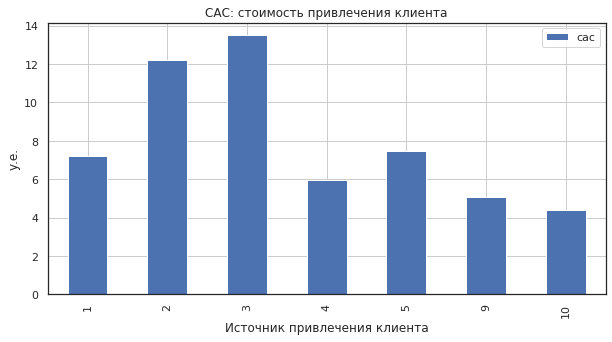

In [58]:
cac_source.plot(kind='bar', y='cac', x='source_id', grid=True, figsize=(10, 5));
#cac_source.plot(y='cac', x='source_id', grid=True, figsize=(12, 6));
plt.title('САС: стоимость привлечения клиента')
plt.xlabel('Источник привлечения клиента')
plt.ylabel('у.е.');

Минимальные траты на привлечение клиента из 4-го, 9-го и 10 источников. Максимальные траты из 2-го и 3-го источников

### Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт

In [59]:
ltv_source = orders
ltv_source['order_month'] = ltv_source['buy_ts'].astype('datetime64[M]')

In [60]:
orders_source['order_month'] = orders_source['buy_ts'].astype('datetime64[M]')
orders_source['first_order_ts'] = orders_source.groupby('uid')['buy_ts'].transform('min')
orders_source['first_order_month'] = orders_source['first_order_ts'].astype('datetime64[M]')

In [61]:
cohorts_source = orders_source.groupby(['first_order_month','source_id']).agg({'uid': 'nunique'}).reset_index()
cohorts_source.columns = ['first_order_month', 'source_id', 'n_buyers']

In [62]:
revenue_source = orders_source.groupby(
    ['first_order_month','order_month', 'source_id']
).agg({'revenue': 'sum'}).reset_index()

In [63]:
costs_date = costs
costs_date['order_month'] = costs_date['dt'].astype('datetime64[M]')
costs_source = costs_date.groupby(['order_month', 'source_id']).agg({'costs': 'sum'}).reset_index()

In [64]:
buyers_costs_source = pd.merge(revenue_source, costs_source, left_on=['order_month', 'source_id'], right_on=['order_month', 'source_id'])

In [65]:
romi_source = pd.merge(
    buyers_costs_source,
    cohorts_source,
    on=['first_order_month', 'source_id'])

In [66]:
romi_source['age'] = (
    (romi_source['order_month'] - romi_source['first_order_month']) / np.timedelta64(1, 'M')
).round().astype('int')

In [67]:
romi_source['ltv'] = romi_source.revenue / romi_source.n_buyers
romi_source['cac'] = romi_source['costs'] / romi_source['n_buyers']
romi_source['romi'] = romi_source['ltv'] / romi_source['cac']
romi_source.head()

,first_order_month,order_month,source_id,revenue,costs,n_buyers,age,ltv,cac,romi
0,2017-06-01,2017-06-01,1,1378.70,1125.61,190,0,7.256316,5.924263,1.224847
1,2017-06-01,2017-07-01,1,414.98,1072.88,190,1,2.184105,5.646737,0.386791
2,2017-06-01,2017-08-01,1,419.43,951.81,190,2,2.207526,5.009526,0.440666
3,2017-06-01,2017-09-01,1,714.24,1502.01,190,3,3.759158,7.905316,0.475523
4,2017-06-01,2017-10-01,1,811.20,2315.75,190,4,4.269474,12.188158,0.350297


In [68]:
romi_source_output = romi_source.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output.loc['mean'] = romi_source_output.mean()
#romi_source_output.round(2) 

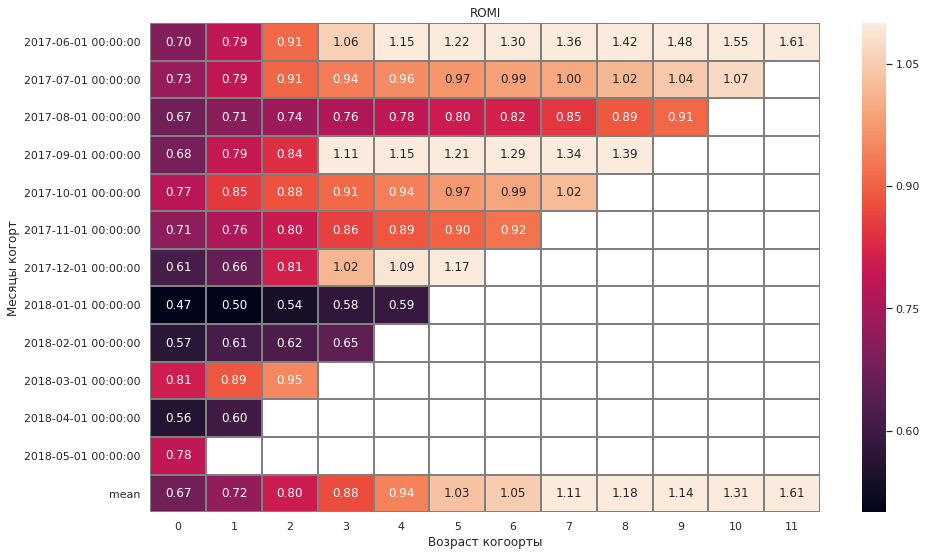

In [69]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1.1, fmt=".2f"); 
plt.title('ROMI')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

В среднем когорты окупаются с 6-го месяца. Самые окупаемые когорты за июнь, сентябрь, декабрь, они приносят прибыль на 4-1 месяц. 

Посмотрим на тепловую карту первого источника

In [70]:
romi_source_1 = romi_source.query('source_id == 1')
romi_source_output_1 = romi_source_1.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_1.loc['mean'] = romi_source_output_1.mean()

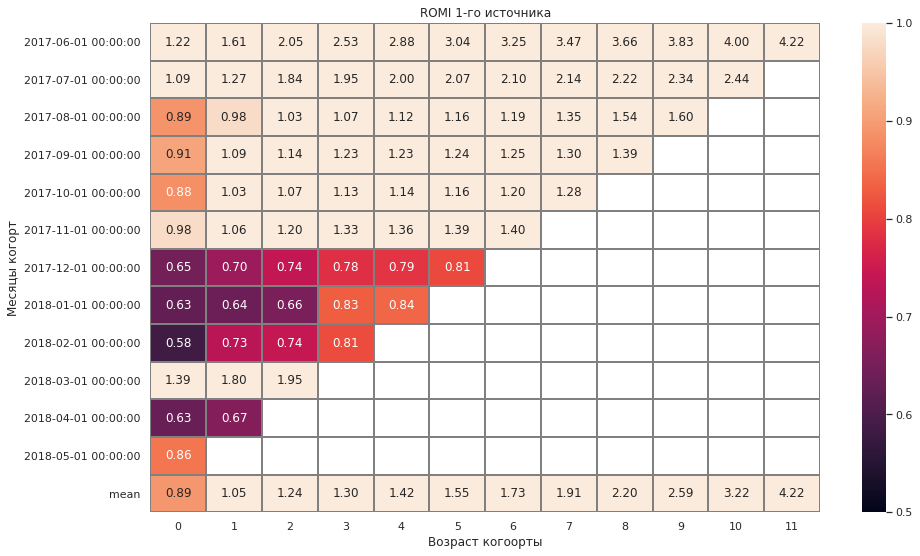

In [71]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_1, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 1-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для первого источника в среднем окупаемость 1-й когорты наступает на 2-й месяц. Июнь, июль и март окупились в первый месяц.

Посмотрим на тепловую карту второго источника

In [72]:
romi_source_2 = romi_source.query('source_id == 2')
romi_source_output_2 = romi_source_2.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_2.loc['mean'] = romi_source_output_2.mean()

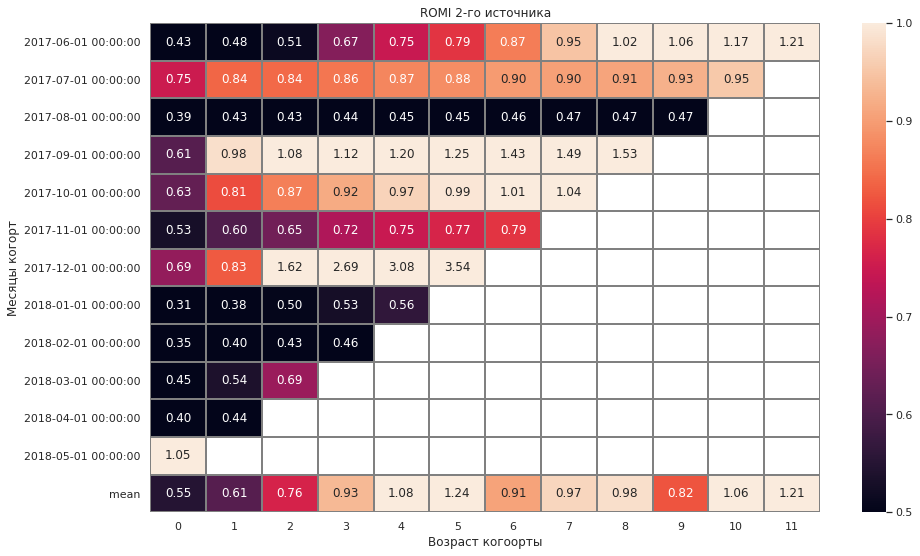

In [73]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_2, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 2-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для второго источника средняя окупаемость когорт наступает на 5-й месяц. Когорта за май окупилась в первый месяц, за август окупаемость не наступила спустя 10 месяцев

Посмотрим на тепловую карту третьего источника

In [74]:
romi_source_3 = romi_source.query('source_id == 3')
romi_source_output_3 = romi_source_3.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_3.loc['mean'] = romi_source_output_3.mean()

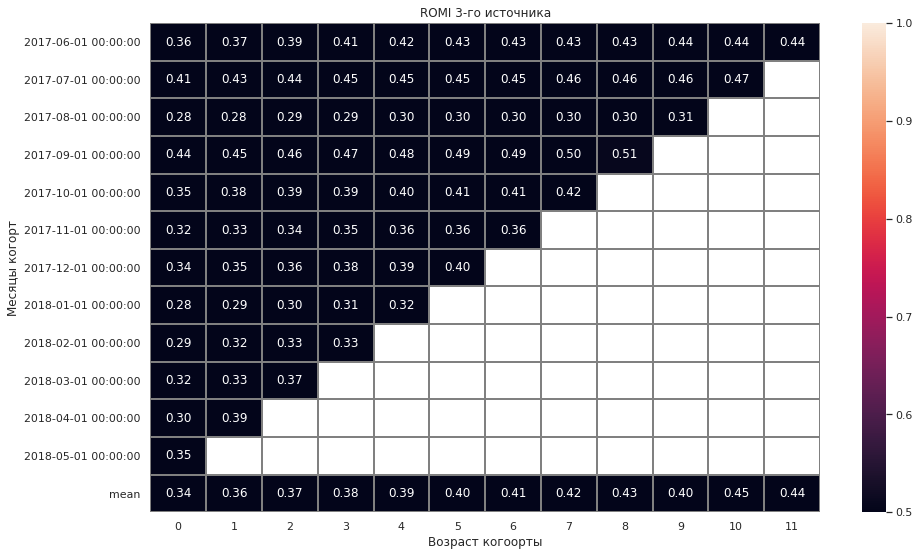

In [75]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_3, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 3-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для третьего источника ни один месяц когорт не является прибыльным. Все когорты убыточны, в среднем не возвращают даже половины вложенных средств

Посмотрим на тепловую карту четвертого источника

In [76]:
romi_source_4 = romi_source.query('source_id == 4')
romi_source_output_4 = romi_source_4.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_4.loc['mean'] = romi_source_output_4.mean()

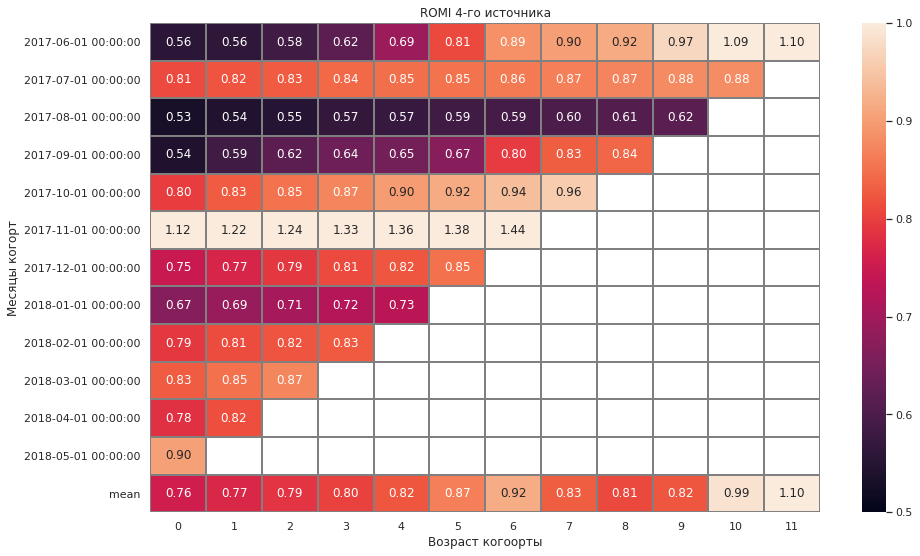

In [77]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_4, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 4-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для четвертого источника в среднем когорта окупается на 12-й месяц. За ноябрь месяц когорта прибыльна с самого начала. Когорта за август не окупилась на 10-й месяц

Посмотрим на тепловую карту пятого источника

In [78]:
romi_source_5 = romi_source.query('source_id == 5')
romi_source_output_5 = romi_source_5.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_5.loc['mean'] = romi_source_output_5.mean()

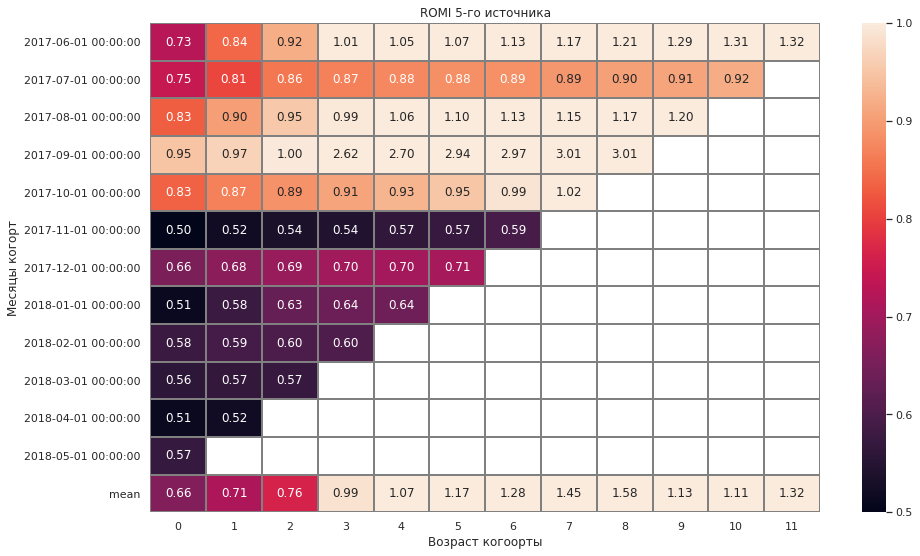

In [79]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_5, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 5-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для пятого источника в среднем когорта окупается на 4-й месяц. До октября когорты показывали неплохую динамику. С ноября идет слабая окупаемость

Посмотрим на тепловую карту девятого источника

In [80]:
romi_source_9 = romi_source.query('source_id == 9')
romi_source_output_9 = romi_source_9.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_9.loc['mean'] = romi_source_output_9.mean()

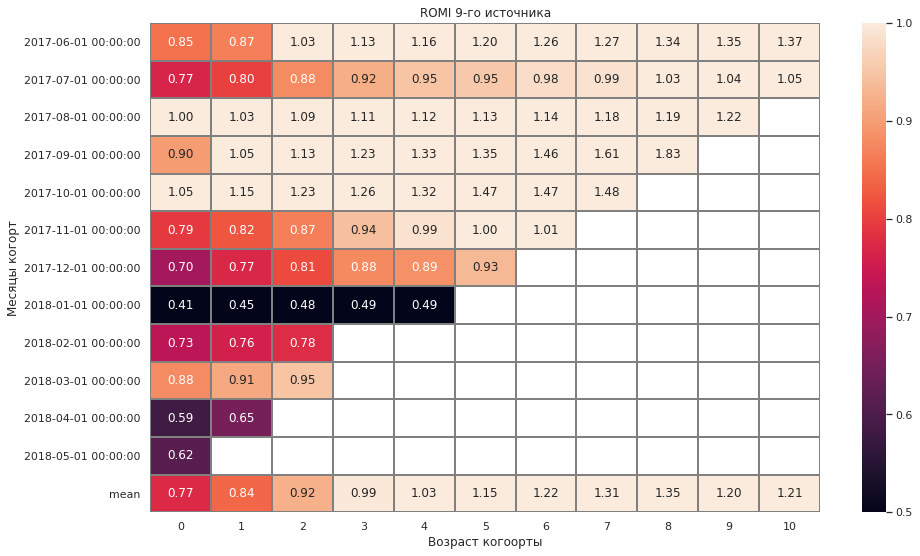

In [81]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_9, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 9-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для девятого источника средняя окупаемость когорт наступает на 4-й месяц. Когорты за август и октябрь окупились в первый месяц, за январь идет слабая окупаемость

Посмотрим на тепловую карту десятого источника

In [82]:
romi_source_10 = romi_source.query('source_id == 10')
romi_source_output_10 = romi_source_10.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1)
romi_source_output_10.loc['mean'] = romi_source_output_10.mean()

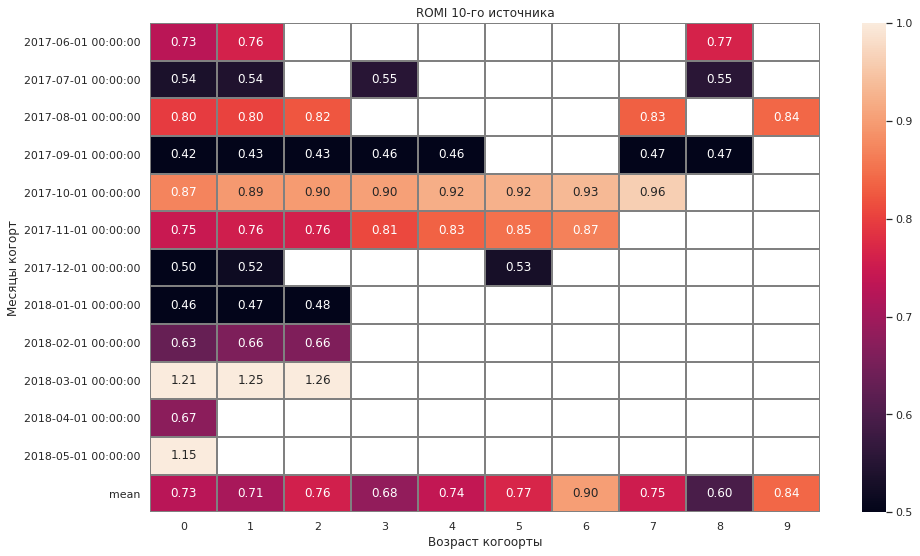

In [83]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_source_output_10, annot=True, linewidths=1, linecolor='gray',vmax = .5, vmin = 1., fmt=".2f"); 
plt.title('ROMI 10-го источника')
plt.xlabel('Возраст когоорты')
plt.ylabel('Месяцы когорт');

Для десятого источника когорты в среднем не окупаются. Когорты доход приносят не каждый месяц. За март и май когорты окупились с самого начала.

### Вывод по маркетинговым метрикам

Все распределения расходов по источникам выглядят одинаково. В летние месяцы затраты минимальны, до зимы идет увеличение в 2-3 раза, потом спад
Минимальная стоимость привлечения клиента в мае, максимальная в августе, в остальное время стоимость привлечения клиента близка к среднему значению
Минимальные траты на привлечение клиента из 4-го, 9-го и 10 источников. Максимальные траты из 2-го и 3-го источников
Привлечение одного покупателя ободится в среднем 9 у.е.
САС 2-го и 3-го источников в несколько раз больше чем САС остальных источников и составляют 12-13 у.е. САС с остальных источников составляет от 4-х до 7 у.е.

Все распределения расходов по источникам выглядят одинаково. В летние месяцы затраты минимальны, до зимы идет увеличение в 2-3 раза, потом спад.
Минимальная стоимость привлечения клиента в мае, максимальная в августе, в остальное время стоимость привлечения клиента близка к среднему значению.
Минимальные траты на привлечение клиента из 4-го, 9-го и 10 источников. Максимальные траты из 2-го и 3-го источников.

В среднем когорты окупаются с 6-го месяца. Самые окупаемые когорты за июнь, сентябрь, декабрь, они приносят прибыль на 4-1 месяц.

В среднем окупаемость 1-й когорты наступает на 2-й месяц. Июнь, июль и март окупились в первый месяц.

Для второго источника средняя окупаемость когорт наступает на 5-й месяц. Когорта за май окупилась в первый месяц, за август окупаемость не наступила спустя 10 месяцев

Для третьего источникани один месяц когорт не является прибыльным. Все когорты убыточны, в среднем не возвращают даже половины вложенных средств

Для четвертого источника в среднем когорты окупаются на 12-й месяц. За ноябрь месяц когорта прибыльна с самого начала. Когорта за август не окупилась на 10-й месяц

Для пятого источника в среднем когорты окупаются на 4-й месяц. До октября когорты показывали неплохую динамику. С ноября идет слабая окупаемость

Для девятого источника средняя окупаемость когорт наступает на 4-й месяц. Когорты за август и октябрь окупились в первый месяц, за январь идет слабая окупаемость

Для десятого источника когорты в среднем не окупаются. Когорты доход приносят не каждый месяц. За март и май когорты окупились с самого начала.



# Шаг 3. Общие выводы и рекомендации

<div class="alert alert-info" role="alert">
Мы проанализировали данные Яндекс.Афиши с июня 2017 по конец мая 2018 года. 
Данные представляют собой 3 датасета с информацией о визитах пользователей, заказов и расходов на привлечение клиентов.

Мы открыли файлы с данными и изучили общую информацию.
Добавили необходимые столбцы для удобства анализа, сравнения и получения дополнительных данных.

в Шаге 2. Рассчитали метрики и построили графики:
    Посчитали метрики трёх видов:
        продуктовые,
        метрики электронной коммерции,
        маркетинговые.
Отобразили на графиках изменения каждой метрики во времени.

Рассчитали метрики следующим образом:

2.1. Продуктовые метрики
2.1.1. Рассчитали DAU, WAU и MAU. Вычислили средние значения этих метрик за весь период;
2.1.2. Определили, сколько раз за день пользователи в среднем заходят на сайт;
2.1.3. Исследовали, сколько времени пользователи проводят на сайте. Узнали продолжительность типичной пользовательской сессии за весь период. Построили график распределения;
2.1.4. Рассчитали Retention Rate, применяя когортный анализ. Нашли средний Retention Rate на второй месяц «жизни» когорт.

2.2. Метрики электронной коммерции
2.2.1. Исследовали, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
2.2.2. Рассчитали среднее количество покупок на одного покупателя за 6 месяцев;
2.2.3. Рассчитали средний чек;
2.2.4. Выяснили, как меняется во времени LTV на покупателя по когортам. Рассчитали средний LTV по когортам за 6 месяцев;

2.3. Маркетинговые метрики
Посчитали и отобразили на графиках, как маркетинговые метрики различаются по рекламным источникам.
2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам;
2.3.2. Рассчитали средний CAC на одного покупателя для всего проекта и для каждого источника трафика;
2.3.3. Рассчитали ROMI по когортам в разрезе источников. Сравнили окупаемость за одинаковые периоды жизни когорт.
    
    
Выводы

Проанализировав продуктовые метрики, мы пришли к следующим выводам: Количество уникальных пользователей в день составляет 907 человек; Количество уникальных пользователей в неделю составляет 5716 человек; Количество уникальных пользователей в неделю составляет 5716 человек; Среднее число пользователей за день составляет 987 человек; Чаще всего пользователи проводят на сайте около минуты; Число пользователей которые вернулись в последующие месяцы составляет 1-5%. Низкий показатель возврата пользователей возможно это связано с тем, что концерты, театры, выставки пользователи посещают далеко не каждый месяц.


Проанализировав метрики электронной коммерции, мы пришли к следующим выводам:
Среднее время с момента первого посещения сайта до совершения покупки составляет 16 минут;
Среднее количество покупок на одного покупателя за 6 месяцев составляет 1.4;
Средний чек, у.е. - 5.0;
Средний LTV за 6 месяцев после первой покупки составляет около 8 у.е.
Наблюдается плавное увеличение числа пользователей с 500 с августа до 1500 в декабре, затем такое же плавное снижение.
Идет плавное увеличение числа пользователей в месяц от 12 тысяч в июне до 32 тысяч в декабре и в дальнейшем плавное снижение посещаемости.
Количество уникальных пользователей за день/неделю/месяц мы наблюдаем сезонное изменение числа пользователей с минимальным количеством в летнее время и плавным увеличением в 3 раза в зимнее время и также дальнейшим плавным снижением до летнего периода.


Проанализировав маркетинговые метрики, мы пришли к следующим выводам:
Все распределения расходов по источникам выглядят одинаково. В летние месяцы затраты минимальны, до зимы идет увеличение в 2-3 раза, потом спад
Минимальная стоимость привлечения клиента в мае, максимальная в августе, в остальное время стоимость привлечения клиента близка к среднему значению
Минимальные траты на привлечение клиента из 4-го, 9-го и 10 источников. Максимальные траты из 2-го и 3-го источников
Привлечение одного покупателя ободится в среднем 9 у.е.
САС 2-го и 3-го источников в несколько раз больше чем САС остальных источников и составляют 12-13 у.е. САС с остальных источников составляет от 4-х до 7 у.е.

Все распределения расходов по источникам выглядят одинаково. В летние месяцы затраты минимальны, до зимы идет увеличение в 2-3 раза, потом спад.
Минимальная стоимость привлечения клиента в мае, максимальная в августе, в остальное время стоимость привлечения клиента близка к среднему значению.
Минимальные траты на привлечение клиента из 4-го, 9-го и 10 источников. Максимальные траты из 2-го и 3-го источников.

В среднем когорты окупаются с 6-го месяца. Самые окупаемые когорты за июнь, сентябрь, декабрь, они приносят прибыль на 4-1 месяц.

В среднем окупаемость 1-й когорты наступает на 2-й месяц. Июнь, июль и март окупились в первый месяц.

Для второго источника средняя окупаемость когорт наступает на 5-й месяц. Когорта за май окупилась в первый месяц, за август окупаемость не наступила спустя 10 месяцев

Для третьего источникани один месяц когорт не является прибыльным. Все когорты убыточны, в среднем не возвращают даже половины вложенных средств

Для четвертого источника в среднем когорты окупаются на 12-й месяц. За ноябрь месяц когорта прибыльна с самого начала. Когорта за август не окупилась на 10-й месяц

Для пятого источника в среднем когорты окупаются на 4-й месяц. До октября когорты показывали неплохую динамику. С ноября идет слабая окупаемость

Для девятого источника средняя окупаемость когорт наступает на 4-й месяц. Когорты за август и октябрь окупились в первый месяц, за январь идет слабая окупаемость

Для десятого источника когорты в среднем не окупаются. Когорты доход приносят не каждый месяц. За март и май когорты окупились с самого начала.

Итоги когортного анализа:
Самый окупаемый является первый источник. За год он принел 4-х кратную прибыль. Данный источник показал отличные результаты за исключением когорт в декабре, январе и феврале.
Хорошие результаты показывают 4-й, 5-й и 9-й источники с периодом окупаемости несколько месяцев.
Расходы по привлечению клиентов с 3-го источника необходимо сократить, поскольку он является сильно убыточным.

</div>